In [6]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'C:\Users\biselli\Desktop\Code\MasterThesis\EBIC_Analysis_Tool\perpendicular_plots\fitting_results_summary_Raph.csv')
df_no26B = df[df['sample'] != '26B2']  # Exclude sample 26B2

In [7]:
df.head()

,sample_folder,filename,sample,type,zoom,aperture,vb,profile,depletion_width_um,left_slope,left_r2,left_Lp_um,left_start_um,right_slope,right_r2,right_Ln_um,right_start_um
0,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_01.csv,MidMag,DISS,Vb02,NaN,NaN,1,0.017375,14.685983,0.988932,1.0,-0.001931,2.297516,0.996910,1.0,0.015444
1,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_02.csv,MidMag,DISS,Vb02,NaN,NaN,2,0.023166,15.710800,0.987101,1.0,-0.001931,2.219728,0.998825,1.0,0.021236
2,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_03.csv,MidMag,DISS,Vb02,NaN,NaN,3,0.040541,18.696659,0.994475,1.0,-0.019305,2.389333,0.996472,1.0,0.021236
3,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_04.csv,MidMag,DISS,Vb02,NaN,NaN,4,0.028958,15.134262,0.992773,1.0,-0.007722,2.346893,0.996818,1.0,0.021236
4,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_05.csv,MidMag,DISS,Vb02,NaN,NaN,5,0.017375,14.221676,0.993375,1.0,-0.001931,2.215835,0.997454,1.0,0.015444


In [9]:
df['type'] = df['sample_folder'].str.split('_').str[0]
df['vb'] = df['filename'].str.extract(r'Vb(\d+)')[0].astype(float) / 10
df.head()

,sample_folder,filename,sample,type,zoom,aperture,vb,profile,depletion_width_um,left_slope,left_r2,left_Lp_um,left_start_um,right_slope,right_r2,right_Ln_um,right_start_um
0,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_01.csv,MidMag,120-400,Vb02,NaN,0.2,1,0.017375,14.685983,0.988932,1.0,-0.001931,2.297516,0.996910,1.0,0.015444
1,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_02.csv,MidMag,120-400,Vb02,NaN,0.2,2,0.023166,15.710800,0.987101,1.0,-0.001931,2.219728,0.998825,1.0,0.021236
2,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_03.csv,MidMag,120-400,Vb02,NaN,0.2,3,0.040541,18.696659,0.994475,1.0,-0.019305,2.389333,0.996472,1.0,0.021236
3,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_04.csv,MidMag,120-400,Vb02,NaN,0.2,4,0.028958,15.134262,0.992773,1.0,-0.007722,2.346893,0.996818,1.0,0.021236
4,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_05.csv,MidMag,120-400,Vb02,NaN,0.2,5,0.017375,14.221676,0.993375,1.0,-0.001931,2.215835,0.997454,1.0,0.015444


In [12]:
# df['vb'] = df['vb'].replace('noVb', '0')
# df['vb'] = df['vb'].apply(lambda x: f'0.{x[3:]}' if x.startswith('Vb0') else (x[2:] if x.startswith('Vb') and len(x) > 2 else x))
# df['vb'] = pd.to_numeric(df['vb'])
df['D'] = df['type'].str.split('-').str[0].astype(float)
df['P'] = df['type'].str.split('-').str[1].astype(float)
# df['T'] = df['sample'].apply(lambda x: 290 if x.startswith('17A') else (280 if x.startswith('26B') else 300))
# df['ratio'] = df['sample'].apply(lambda x: 5.5 if x.startswith('17A') else (8 if x.startswith('28A') else (5.5 if x.startswith('26B') else 10)))
# df['P'] = df['type'].map({'P1': 400, 'P2': 400, 'P3': 400, 'P4': 200, 'P5': 600})
# df['D'] = df['type'].map({'P1': 45, 'P2': 75, 'P3': 120, 'P4': 45, 'P5': 45})
df["A_ratio"] = (np.pi*df["D"]**2)/(4*df["P"]**2)
df.head()

,sample_folder,filename,sample,type,zoom,aperture,vb,profile,depletion_width_um,left_slope,left_r2,left_Lp_um,left_start_um,right_slope,right_r2,right_Ln_um,right_start_um,D,P,A_ratio
0,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_01.csv,MidMag,120-400,Vb02,NaN,0.2,1,0.017375,14.685983,0.988932,1.0,-0.001931,2.297516,0.996910,1.0,0.015444,120.0,400.0,0.070686
1,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_02.csv,MidMag,120-400,Vb02,NaN,0.2,2,0.023166,15.710800,0.987101,1.0,-0.001931,2.219728,0.998825,1.0,0.021236,120.0,400.0,0.070686
2,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_03.csv,MidMag,120-400,Vb02,NaN,0.2,3,0.040541,18.696659,0.994475,1.0,-0.019305,2.389333,0.996472,1.0,0.021236,120.0,400.0,0.070686
3,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_04.csv,MidMag,120-400,Vb02,NaN,0.2,4,0.028958,15.134262,0.992773,1.0,-0.007722,2.346893,0.996818,1.0,0.021236,120.0,400.0,0.070686
4,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_05.csv,MidMag,120-400,Vb02,NaN,0.2,5,0.017375,14.221676,0.993375,1.0,-0.001931,2.215835,0.997454,1.0,0.015444,120.0,400.0,0.070686


In [4]:
df_28A1_P5 = df[(df['sample'] == '28A1') & (df['type'] == 'P5')]
df_28A1_P5 = df_28A1_P5[~df_28A1_P5['profile'].isin([2, 3, 5])]

In [13]:
df["A_ratio"].unique()

array([0.07068583, 0.01767146, 0.0099402 , 0.00636173, 0.02761165])

In [14]:
print("amount of profiles with missing depletion width:", df['depletion_width_um'].isna().sum())
print("amount of profiles with depletion width:", df['depletion_width_um'].notna().sum())
result = df[df['depletion_width_um'].notna()].groupby(['sample', 'type', 'vb']).size().reset_index(name='count')
print(result[result['count'] == 0])
print("average profiles per samples :",result["count"].mean())
print("median profiles per samples :",result["count"].median())
print("std profiles per samples :",result["count"].std())
print("samples with only 1 profile :",len(result[result["count"] == 1]))

amount of profiles with missing depletion width: 0
amount of profiles with depletion width: 224
Empty DataFrame
Columns: [sample, type, vb, count]
Index: []
average profiles per samples : 11.2
median profiles per samples : 12.0
std profiles per samples : 1.0052493799000692
samples with only 1 profile : 0


In [15]:
df['Lp_nm'] = 1 / df['left_slope'] * 1000
df['Ln_nm'] = 1 / df['right_slope'] * 1000
df['depletion_width_nm'] = df['depletion_width_um'] * 1000
df['right_start_nm'] = df['right_start_um'] * 1000
df['left_start_nm'] = df['left_start_um'] * 1000

In [16]:
df.head(5)


,sample_folder,filename,sample,type,zoom,aperture,vb,profile,depletion_width_um,left_slope,...,right_Ln_um,right_start_um,D,P,A_ratio,Lp_nm,Ln_nm,depletion_width_nm,right_start_nm,left_start_nm
0,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_01.csv,MidMag,120-400,Vb02,NaN,0.2,1,0.017375,14.685983,...,1.0,0.015444,120.0,400.0,0.070686,68.092141,435.252698,17.374517,15.444015,-1.930502
1,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_02.csv,MidMag,120-400,Vb02,NaN,0.2,2,0.023166,15.710800,...,1.0,0.021236,120.0,400.0,0.070686,63.650483,450.505562,23.166023,21.235521,-1.930502
2,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_03.csv,MidMag,120-400,Vb02,NaN,0.2,3,0.040541,18.696659,...,1.0,0.021236,120.0,400.0,0.070686,53.485491,418.526783,40.540541,21.235521,-19.305019
3,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_04.csv,MidMag,120-400,Vb02,NaN,0.2,4,0.028958,15.134262,...,1.0,0.021236,120.0,400.0,0.070686,66.075238,426.095328,28.957529,21.235521,-7.722008
4,120-400_MidMag_DISS_Vb0,MidMag_DISS_Vb02_profile_05.csv,MidMag,120-400,Vb02,NaN,0.2,5,0.017375,14.221676,...,1.0,0.015444,120.0,400.0,0.070686,70.315199,451.297144,17.374517,15.444015,-1.930502


In [9]:
df_no26B = df[df['sample'] != '26B1']  


In [17]:
def heatmap_with_stats(
    df,
    value_col,
    row="sample",
    col="type",
    vb_limit_up=0.2,
    vb_limit_down=0,
    title=None,
    cmap='viridis'
):
    """
    Generate heatmap with mean, std, count, and percent-present annotations.
    """

    # --- ENSURE 'vb' IS FLOAT ---
    df = df.copy()
    df["vb"] = pd.to_numeric(df["vb"], errors="coerce")

    # --- FILTERING ---
    df_filtered = df[
        (df["vb"] >= vb_limit_down) &
        (df["vb"] <= vb_limit_up)
    ]

    # --- SKIP IF NOTHING LEFT ---
    if df_filtered.empty:
        print(f"[INFO] Skipping: no data for VB between {vb_limit_down} and {vb_limit_up}")
        return

    # Split valid vs missing values
    df_valid = df_filtered[df_filtered[value_col].notna()]
    df_missing = df_filtered[df_filtered[value_col].isna()].copy()
    df_missing[value_col] = 0  # dummy

    # --- PIVOTS ---
    pivot_mean  = df_valid.pivot_table(values=value_col, index=row, columns=col, aggfunc='mean')
    pivot_std   = df_valid.pivot_table(values=value_col, index=row, columns=col, aggfunc='std')
    pivot_count = df_valid.pivot_table(values=value_col, index=row, columns=col, aggfunc='count')
    pivot_missing = df_missing.pivot_table(values=value_col, index=row, columns=col, aggfunc='count')

    # Align tables
    pivot_std     = pivot_std.reindex_like(pivot_mean)
    pivot_count   = pivot_count.reindex_like(pivot_mean)
    pivot_missing = pivot_missing.reindex_like(pivot_mean)

    # --- PERCENT ---
    valid = pivot_count.fillna(0)
    missing = pivot_missing.fillna(0)
    total = valid + missing
    pivot_percent = (valid / total * 100).round(0)

    # --- ANNOTATIONS ---
    annot = pivot_mean.copy().astype(str)

    for i in range(len(pivot_mean)):
        for j in range(len(pivot_mean.columns)):
            mean_val = pivot_mean.iloc[i, j]
            std_val  = pivot_std.iloc[i, j]
            count_val = pivot_count.iloc[i, j]
            perc_val  = pivot_percent.iloc[i, j]

            if pd.notna(mean_val):
                mean_str  = f"{mean_val:.2f}"
                std_str   = f"±{std_val:.2f}" if pd.notna(std_val) else ""
                count_str = f"n={int(count_val)}" if pd.notna(count_val) else ""
                perc_str  = f"{perc_val:.0f}%" if pd.notna(perc_val) else ""

                annot.iloc[i, j] = "\n".join(
                    x for x in [mean_str, std_str, count_str, perc_str] if x
                )
            else:
                annot.iloc[i, j] = ""

    # --- PLOT ---
    plt.figure(figsize=(10, 6))
    sn.heatmap(pivot_mean, annot=annot, fmt='', cmap=cmap)

    if title is None:
        title = f"{value_col} (VB ≤ {vb_limit_up} V and VB ≥ {vb_limit_down} V)"

    plt.title(title)
    plt.tight_layout()
    plt.show()


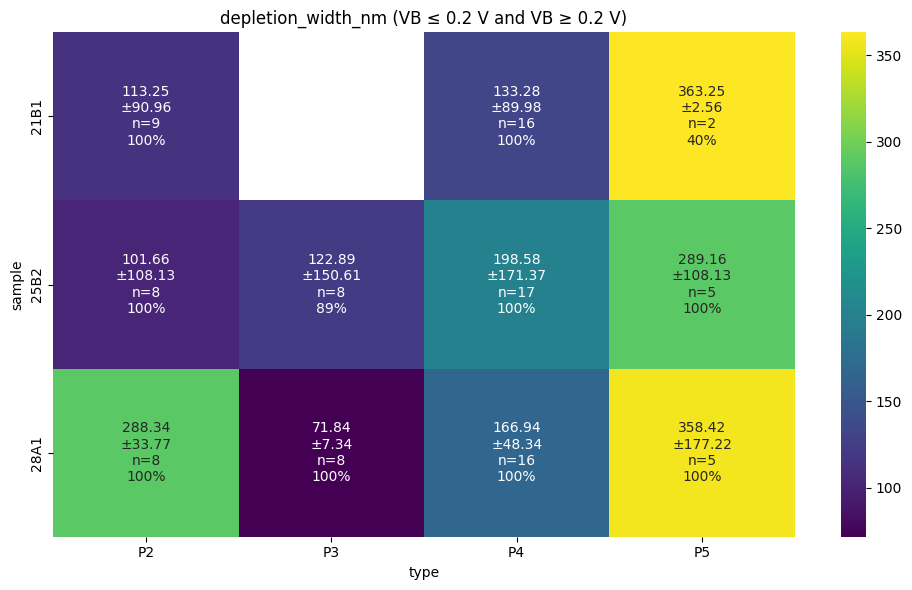

In [11]:
heatmap_with_stats(df, value_col='depletion_width_nm', vb_limit_up=0.2, vb_limit_down=0.2)

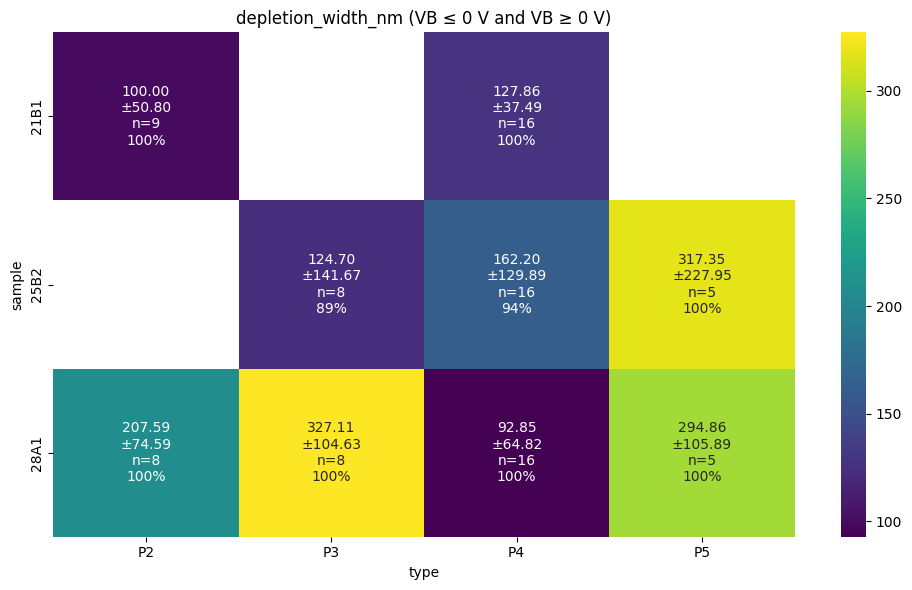

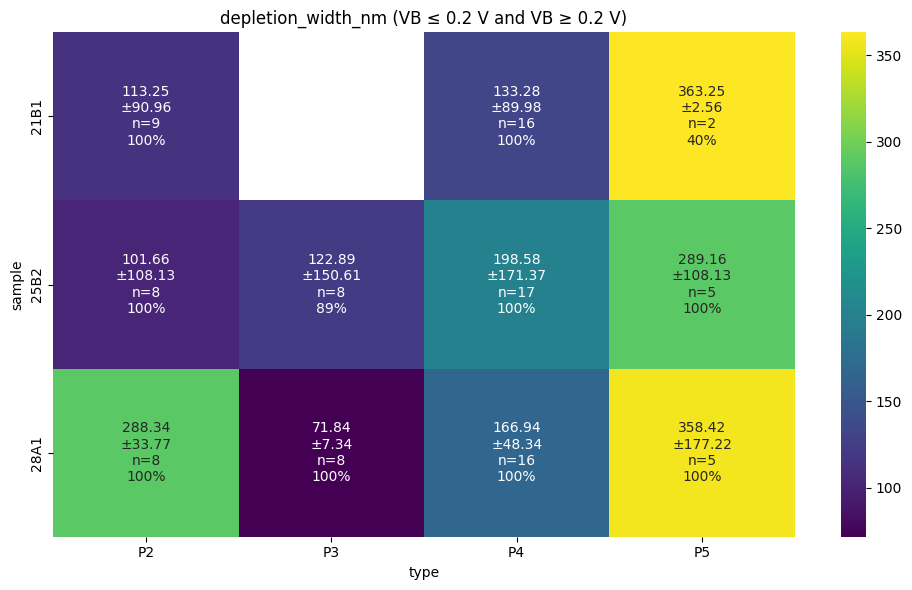

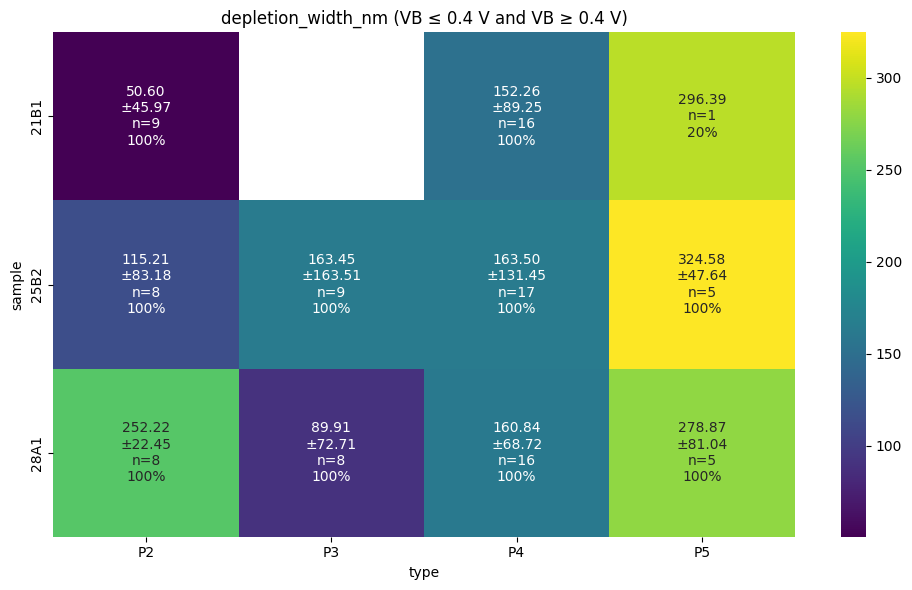

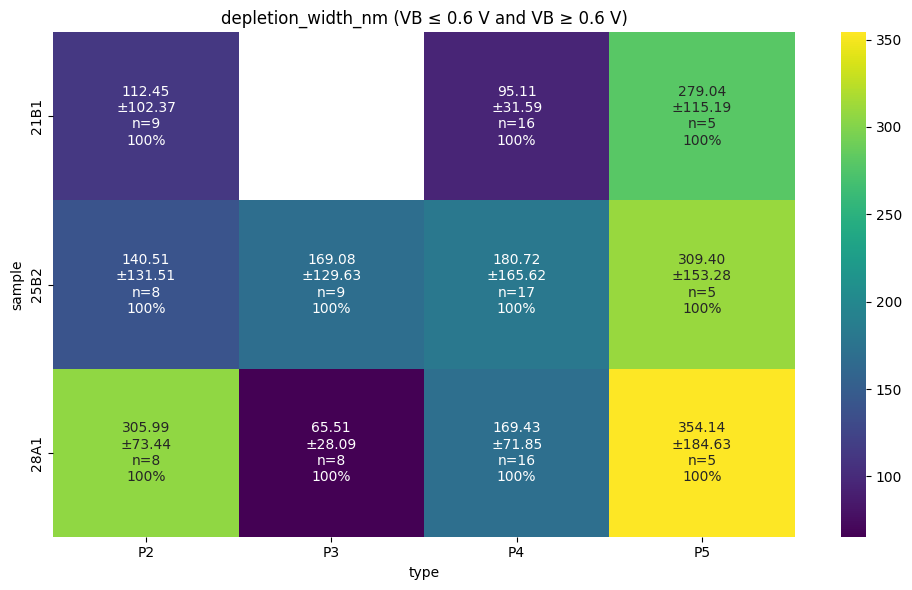

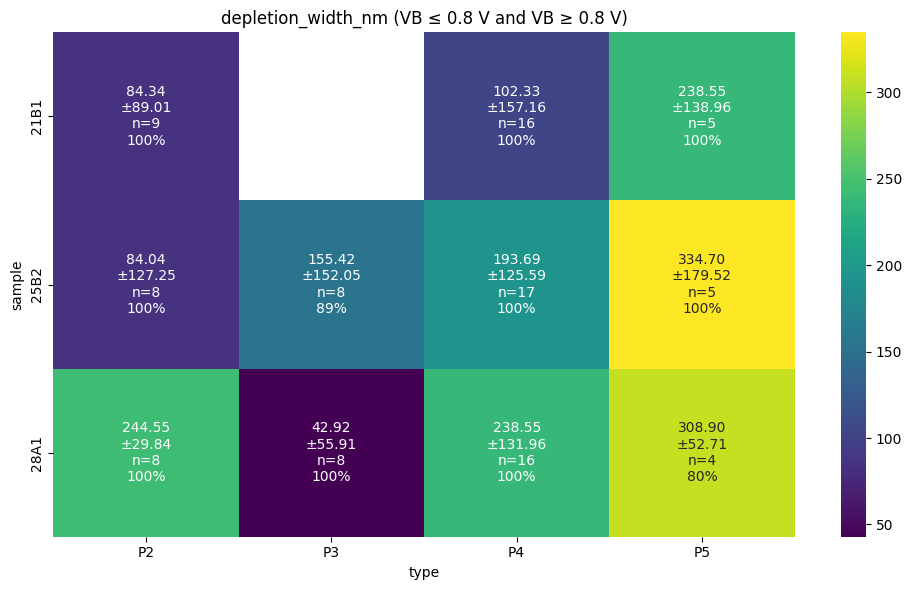

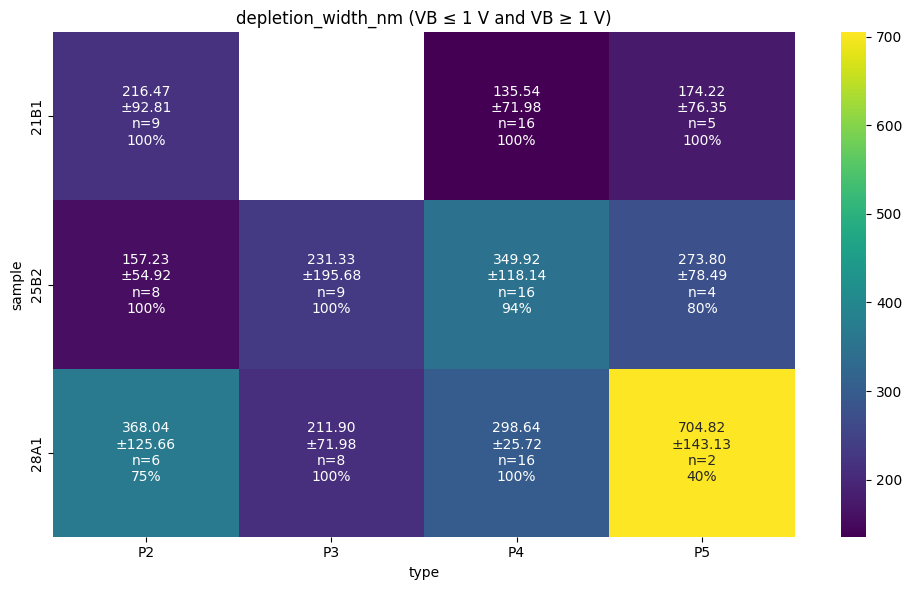

In [12]:
for i in [0,0.2,0.4,0.6,0.8,1]:
    heatmap_with_stats(df_no26B, value_col='depletion_width_nm', vb_limit_up=i, vb_limit_down=i)

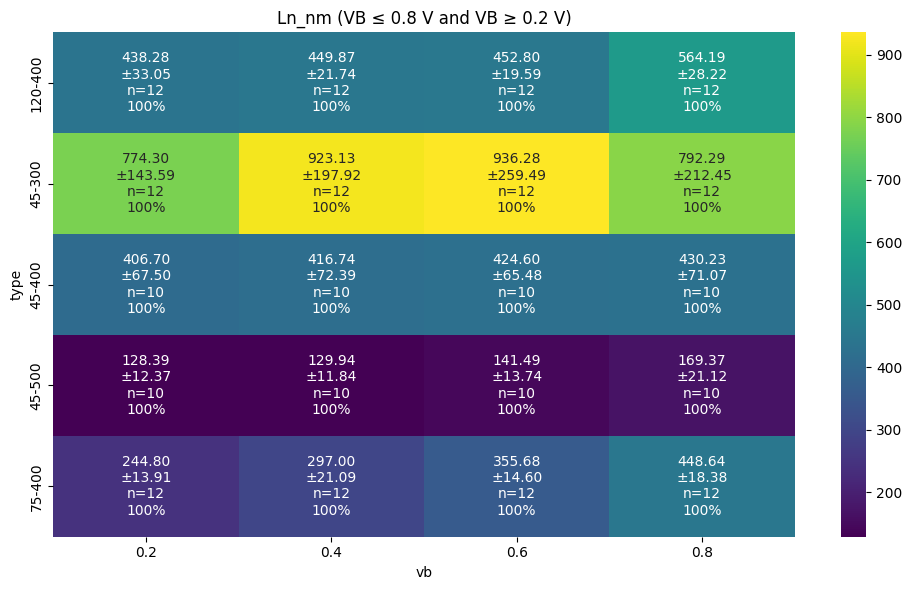

In [24]:
heatmap_with_stats(df, row="type", col="vb",value_col='Ln_nm', vb_limit_up=0.8, vb_limit_down=0.2)

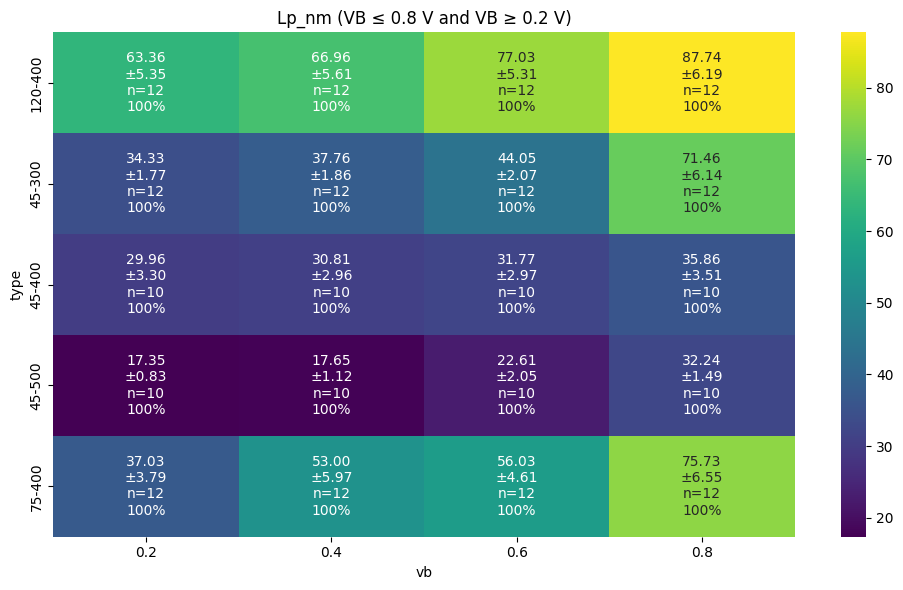

In [25]:
heatmap_with_stats(df, row="type", col="vb",value_col='Lp_nm', vb_limit_up=0.8, vb_limit_down=0.2)

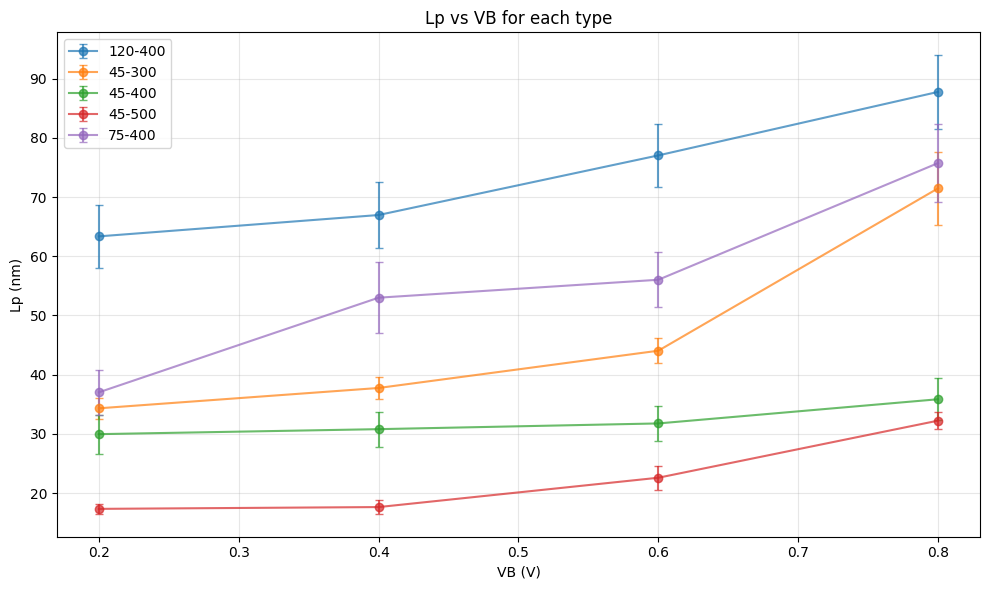

In [27]:
# Filter data where Lp_nm is not null
df_plot = df[df['Lp_nm'].notna()].copy()

# Get unique types
types = sorted(df_plot['type'].unique())

# Create plot
plt.figure(figsize=(10, 6))

for type_val in types:
    df_type = df_plot[df_plot['type'] == type_val]
    
    # Group by VB and calculate mean
    grouped = df_type.groupby('vb')['Lp_nm'].agg(['mean', 'std']).reset_index()
    
    plt.errorbar(grouped['vb'], grouped['mean'], yerr=grouped['std'], 
                label=type_val, marker='o', capsize=3, alpha=0.7)

plt.xlabel('VB (V)')
plt.ylabel('Lp (nm)')
plt.title('Lp vs VB for each type')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [14]:
df_no26B.columns

Index(['sample_folder', 'filename', 'sample', 'type', 'zoom', 'aperture', 'vb',
       'profile', 'depletion_width_um', 'left_slope', 'left_r2', 'left_Lp_um',
       'left_start_um', 'right_slope', 'right_r2', 'right_Ln_um',
       'right_start_um', 'T', 'ratio', 'P', 'D', 'A_ratio', 'Lp_nm', 'Ln_nm',
       'depletion_width_nm', 'right_start_nm', 'left_start_nm'],
      dtype='object')

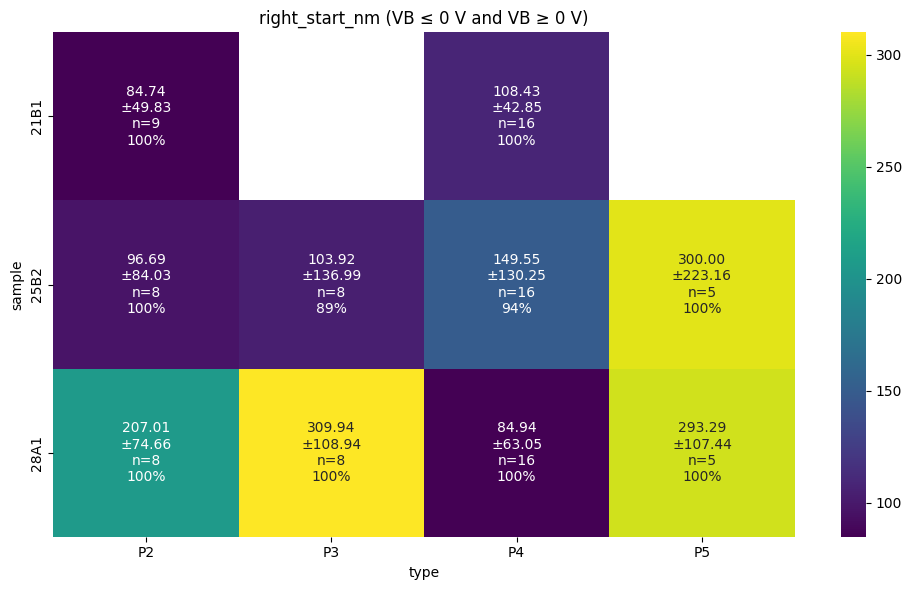

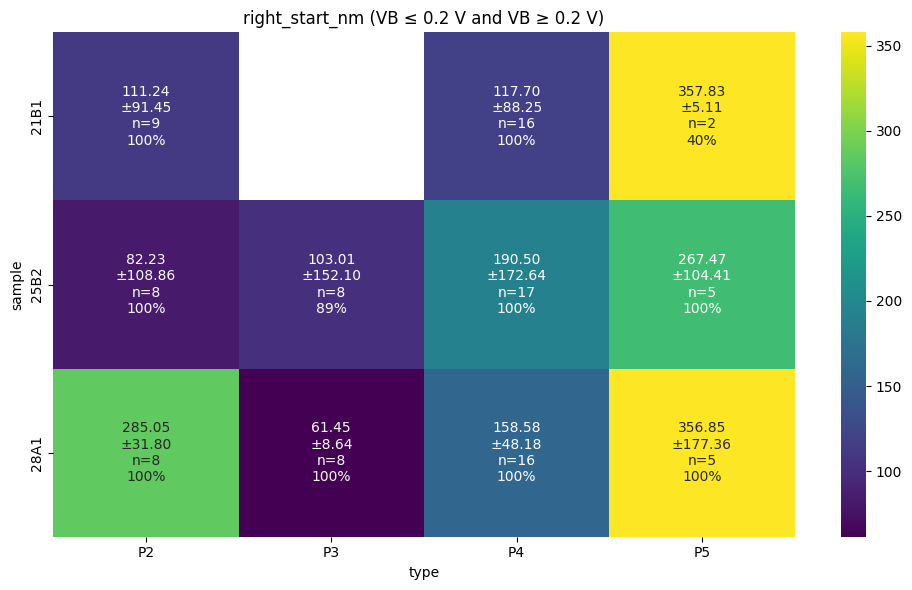

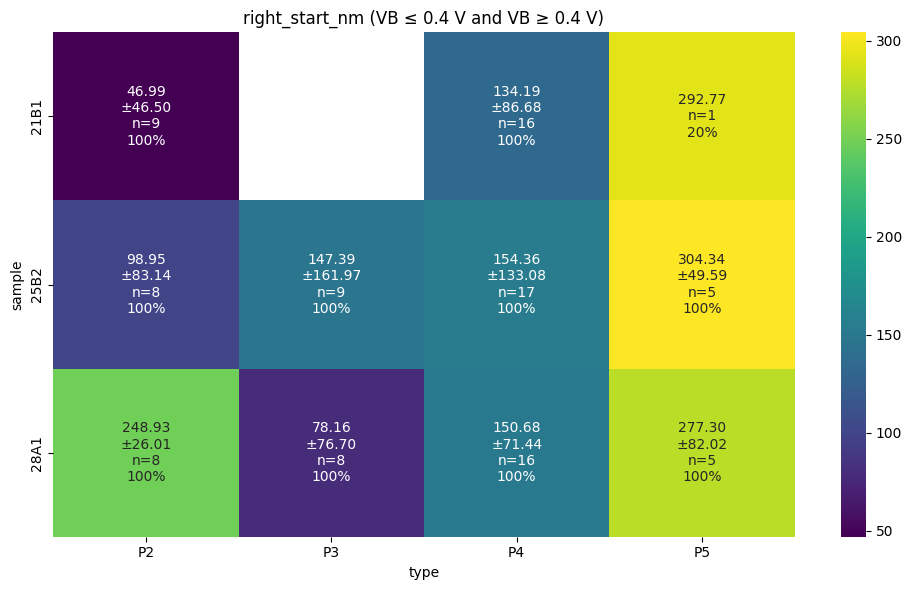

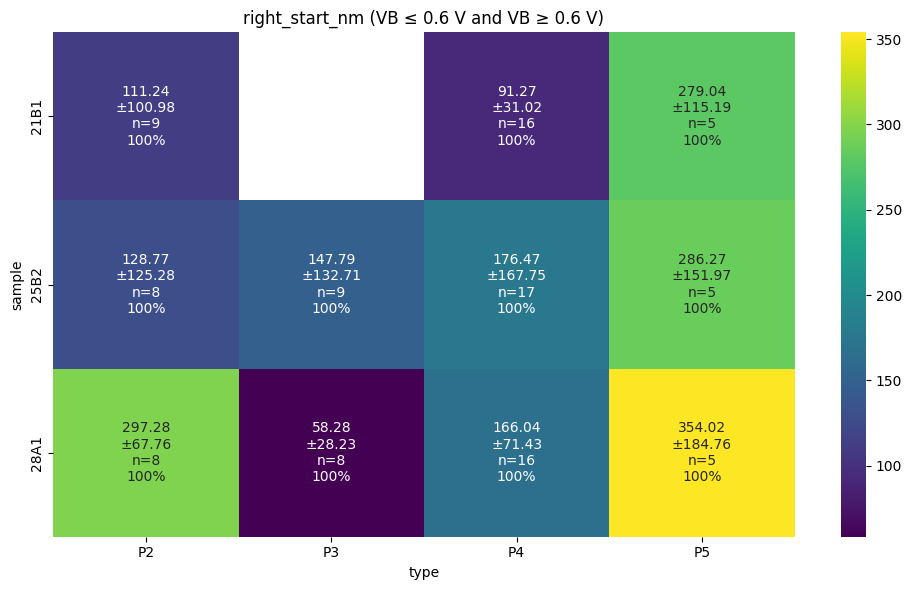

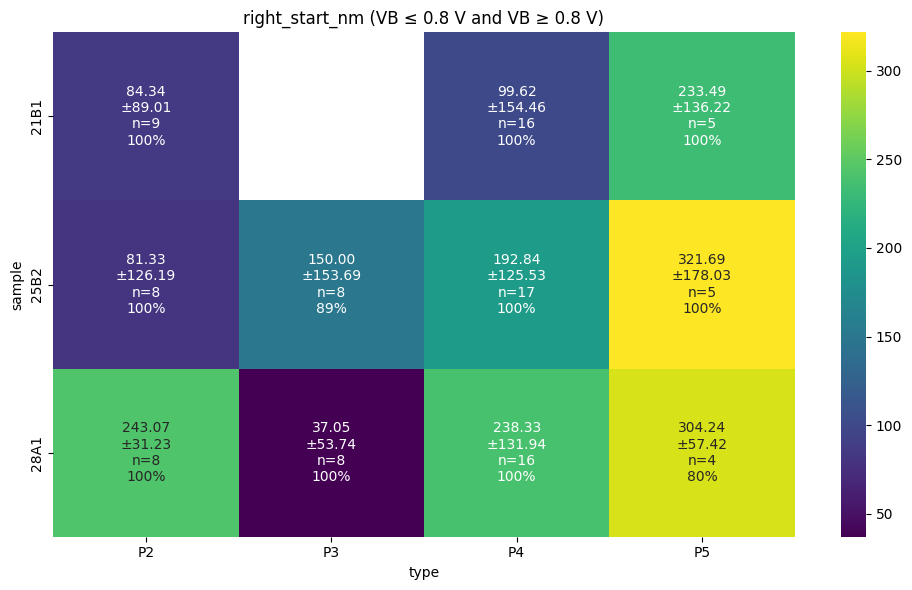

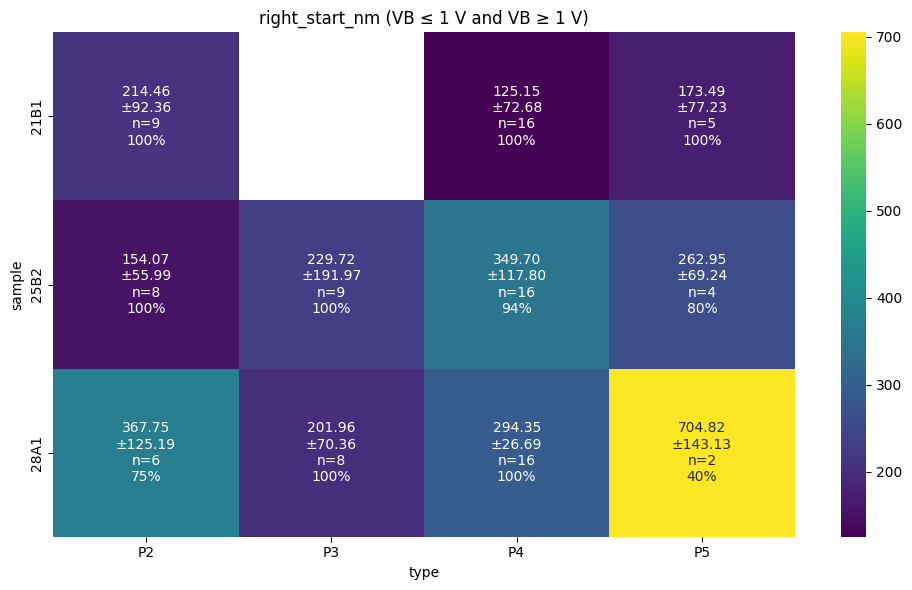

In [15]:
for i in [0,0.2,0.4,0.6,0.8,1]:
    heatmap_with_stats(df_no26B, value_col='right_start_nm', vb_limit_up=i, vb_limit_down=i)

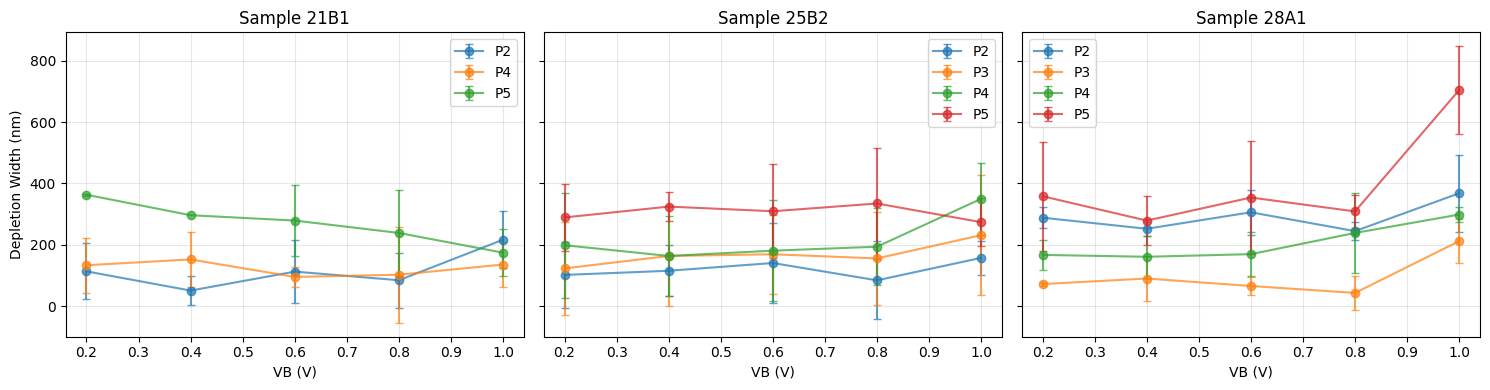

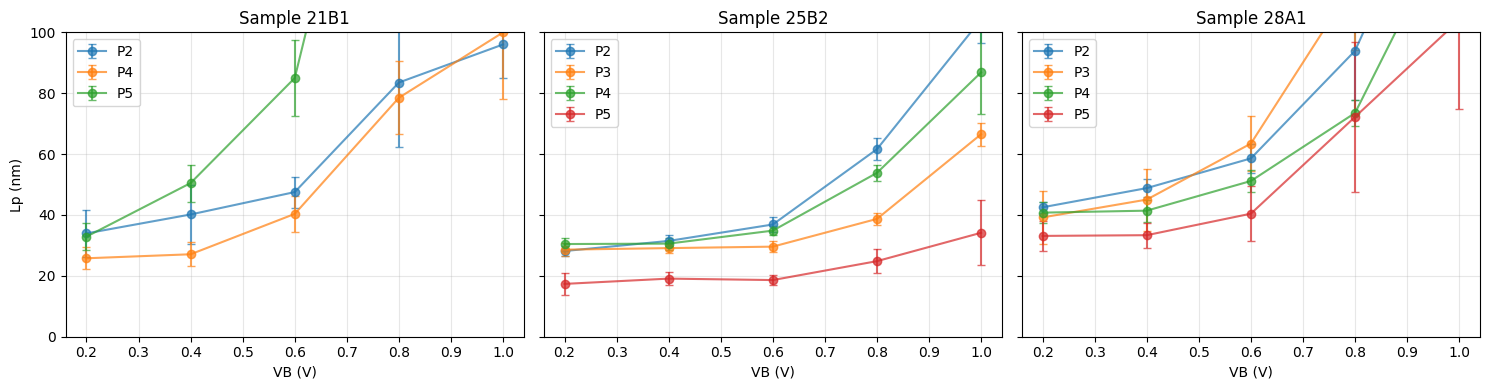

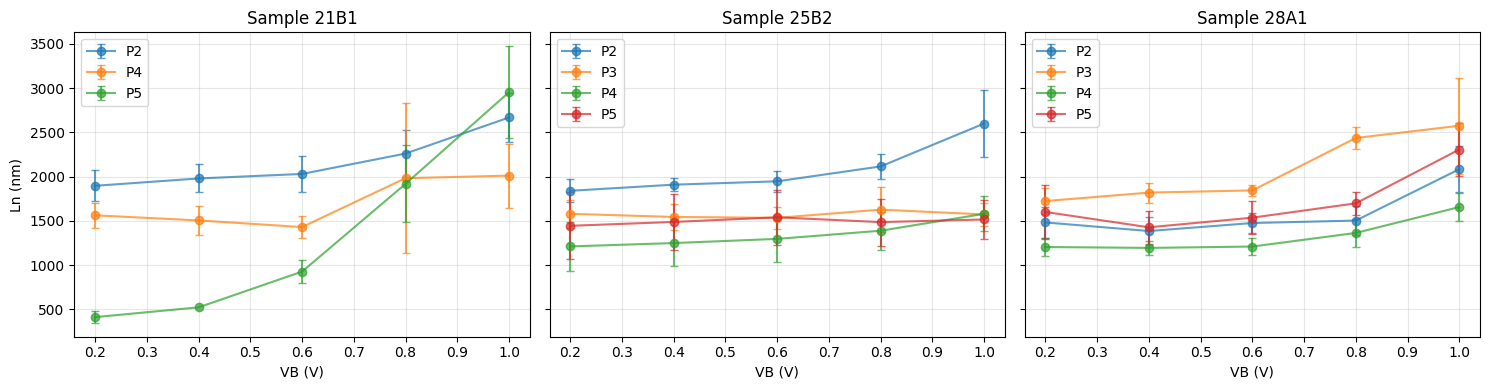

In [16]:
# Define which samples to exclude (empty list = plot all)
exclude_samples = []  # e.g., ['26B1', '26B2'] to exclude these

# Filter data
df_plot = df[~df['sample'].isin(exclude_samples)].copy()
df_plot = df_plot[df_plot['depletion_width_nm'].notna()]

# Get unique samples
samples = sorted(df_plot['sample'].unique())

# Create subplots for each sample
fig, axes = plt.subplots(1, len(samples), figsize=(5*len(samples), 4), sharey=True)

# Handle case of single sample
if len(samples) == 1:
    axes = [axes]

for idx, sample in enumerate(samples):
    ax = axes[idx]
    
    # Filter by sample
    df_sample = df_plot[df_plot['sample'] == sample]
    
    # Plot for each type
    for type_val in df_sample['type'].unique():
        df_type = df_sample[(df_sample['type'] == type_val) & (df_sample["vb"] > 0) & (df_sample["vb"] < 2)]
        
        # Group by VB and calculate mean
        grouped = df_type.groupby('vb')['depletion_width_nm'].agg(['mean', 'std', 'count']).reset_index()
        
        ax.errorbar(grouped['vb'], grouped['mean'], yerr=grouped['std'], 
                   label=type_val, marker='o', capsize=3, alpha=0.7)
    
    ax.set_xlabel('VB (V)')
    ax.set_ylabel('Depletion Width (nm)' if idx == 0 else '')
    ax.set_title(f'Sample {sample}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Define which samples to exclude (empty list = plot all)
exclude_samples = []  # e.g., ['26B1', '26B2'] to exclude these

# Filter data
df_plot = df[~df['sample'].isin(exclude_samples)].copy()
df_plot = df_plot[df_plot['Lp_nm'].notna()]

# Get unique samples
samples = sorted(df_plot['sample'].unique())

# Create subplots for each sample
fig, axes = plt.subplots(1, len(samples), figsize=(5*len(samples), 4), sharey=True)

# Handle case of single sample
if len(samples) == 1:
    axes = [axes]

for idx, sample in enumerate(samples):
    ax = axes[idx]
    
    # Filter by sample
    df_sample = df_plot[df_plot['sample'] == sample]
    
    # Plot for each type
    for type_val in df_sample['type'].unique():
        df_type = df_sample[(df_sample['type'] == type_val) & (df_sample["vb"] > 0) & (df_sample["vb"] < 2)]
        
        # Group by VB and calculate mean
        grouped = df_type.groupby('vb')['Lp_nm'].agg(['mean', 'std', 'count']).reset_index()
        
        ax.errorbar(grouped['vb'], grouped['mean'], yerr=grouped['std'], 
                   label=type_val, marker='o', capsize=3, alpha=0.7)
    
    ax.set_xlabel('VB (V)')
    ax.set_ylabel('Lp (nm)' if idx == 0 else '')
    ax.set_ylim(0, 100)
    ax.set_title(f'Sample {sample}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Define which samples to exclude (empty list = plot all)
exclude_samples = []  # e.g., ['26B1', '26B2'] to exclude these

# Filter data
df_plot = df[~df['sample'].isin(exclude_samples)].copy()
df_plot = df_plot[df_plot['Ln_nm'].notna()]

# Get unique samples
samples = sorted(df_plot['sample'].unique())

# Create subplots for each sample
fig, axes = plt.subplots(1, len(samples), figsize=(5*len(samples), 4), sharey=True)

# Handle case of single sample
if len(samples) == 1:
    axes = [axes]

for idx, sample in enumerate(samples):
    ax = axes[idx]
    
    # Filter by sample
    df_sample = df_plot[df_plot['sample'] == sample]
    
    # Plot for each type
    for type_val in df_sample['type'].unique():
        df_type = df_sample[(df_sample['type'] == type_val) & (df_sample["vb"] > 0) & (df_sample["vb"] < 2)]
        
        # Group by VB and calculate mean
        grouped = df_type.groupby('vb')['Ln_nm'].agg(['mean', 'std', 'count']).reset_index()
        
        ax.errorbar(grouped['vb'], grouped['mean'], yerr=grouped['std'], 
                   label=type_val, marker='o', capsize=3, alpha=0.7)
    
    ax.set_xlabel('VB (V)')
    ax.set_ylabel('Ln (nm)' if idx == 0 else '')
    ax.set_ylim(None, None)
    ax.set_title(f'Sample {sample}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

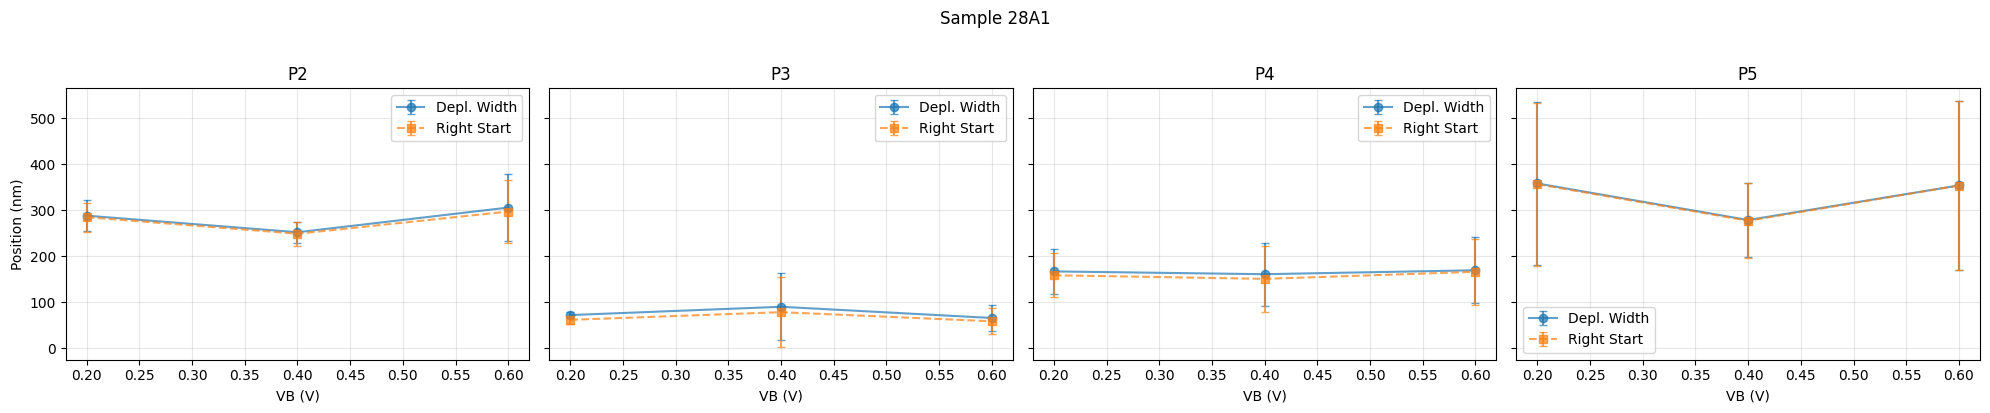

In [17]:
# Define which sample to plot
sample_to_plot = '28A1'  # Change this to the sample you want

# Filter data for the specific sample
df_plot_sample = df[df['sample'] == sample_to_plot].copy()
df_plot_sample = df_plot_sample[df_plot_sample['depletion_width_nm'].notna() & df_plot_sample['right_start_nm'].notna()]

# Get unique types for this sample
types = sorted(df_plot_sample['type'].unique())

# Create subplots for each type
fig, axes = plt.subplots(1, len(types), figsize=(5*len(types), 4), sharey=True)

# Handle case of single type
if len(types) == 1:
    axes = [axes]

for idx, type_val in enumerate(types):
    ax = axes[idx]
    
    # Filter by type
    df_type = df_plot_sample[(df_plot_sample['type'] == type_val) & 
                              (df_plot_sample["vb"] > 0) & 
                              (df_plot_sample["vb"] < 0.8)]
    
    # Group by VB and calculate mean for depletion width
    grouped_depl = df_type.groupby('vb')['depletion_width_nm'].agg(['mean', 'std', 'count']).reset_index()
    
    # Group by VB and calculate mean for right start
    grouped_right = df_type.groupby('vb')['right_start_nm'].agg(['mean', 'std', 'count']).reset_index()
    
    # Plot depletion width
    ax.errorbar(grouped_depl['vb'], grouped_depl['mean'], yerr=grouped_depl['std'], 
               label='Depl. Width', marker='o', capsize=3, alpha=0.7, linestyle='-')
    
    # Plot right start
    ax.errorbar(grouped_right['vb'], grouped_right['mean'], yerr=grouped_right['std'], 
               label='Right Start', marker='s', capsize=3, alpha=0.7, linestyle='--')
    
    ax.set_xlabel('VB (V)')
    ax.set_ylabel('Position (nm)' if idx == 0 else '')
    ax.set_title(f'{type_val}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle(f'Sample {sample_to_plot}', y=1.02)
plt.tight_layout()
plt.show()


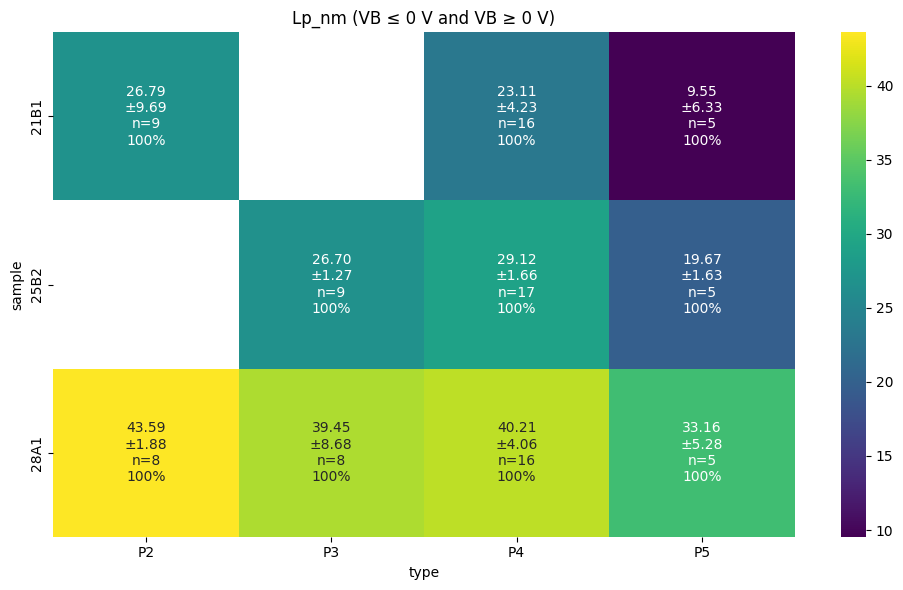

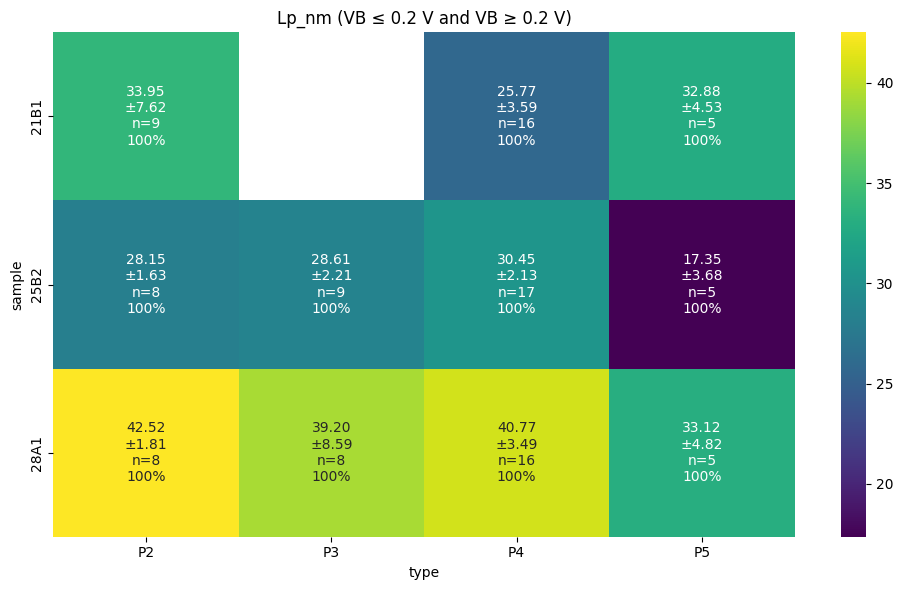

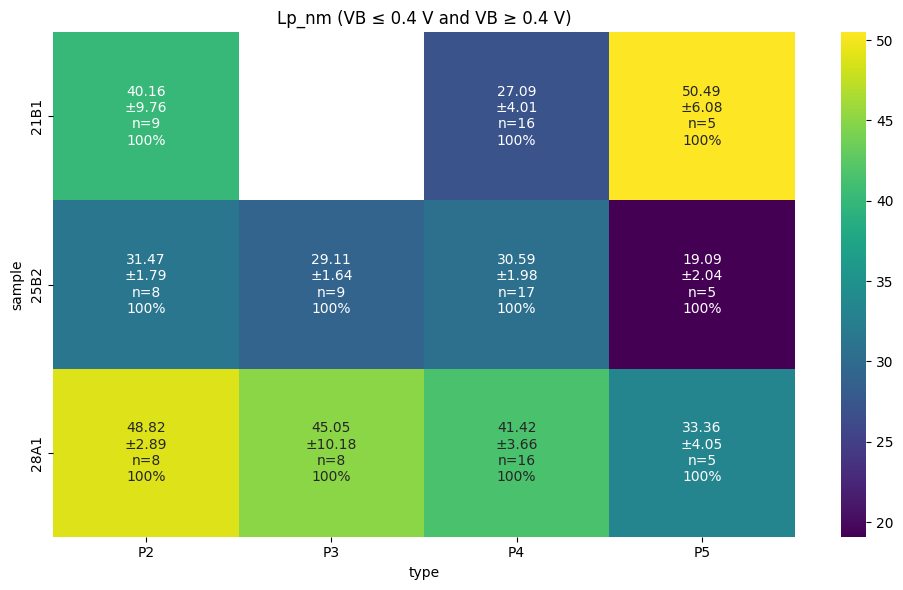

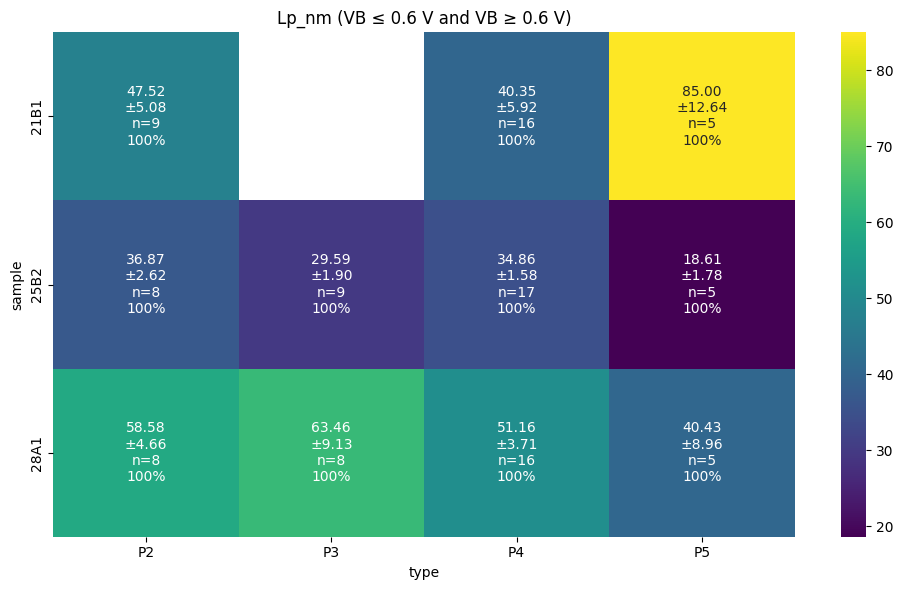

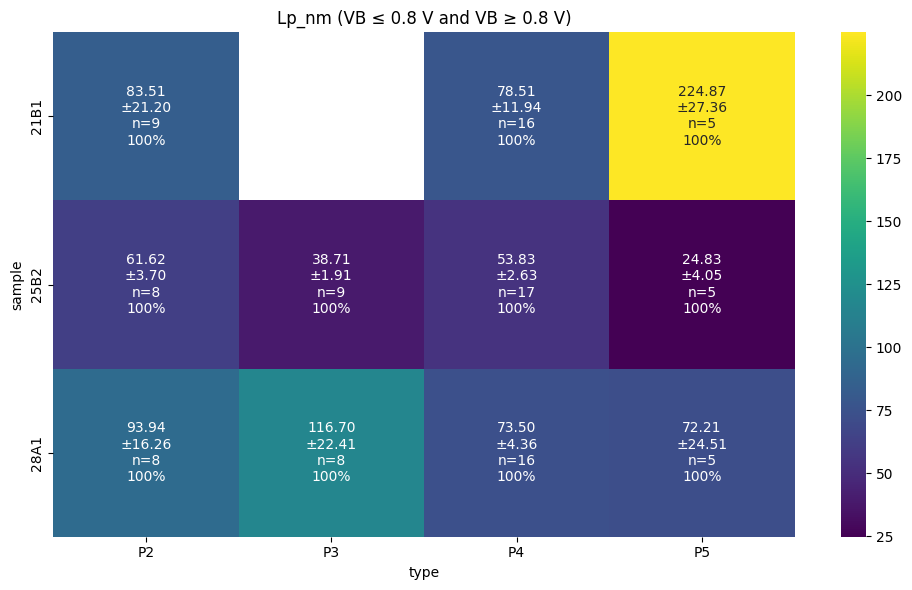

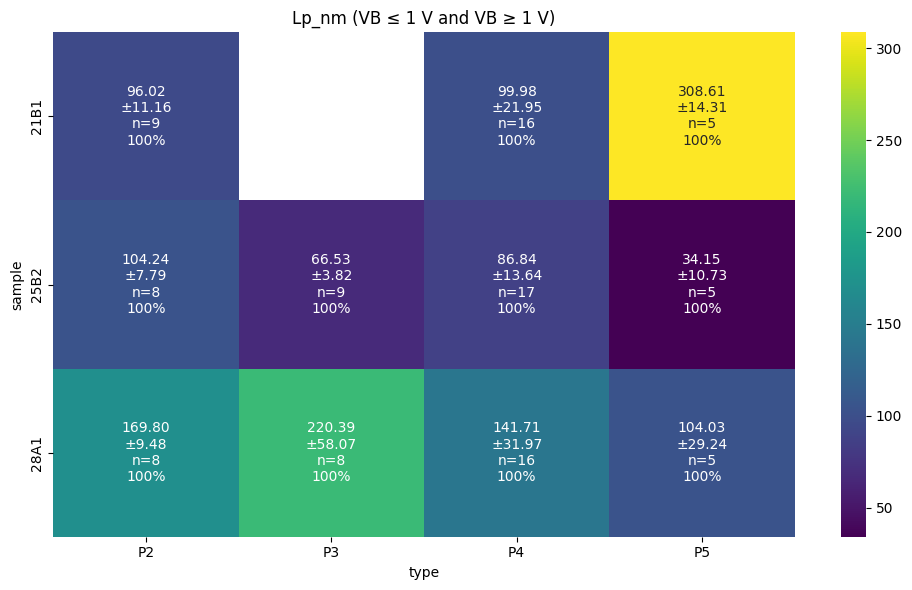

In [18]:
for i in [0,0.2,0.4,0.6,0.8,1]:
    heatmap_with_stats(df_no26B, value_col='Lp_nm', vb_limit_up=i, vb_limit_down=i)


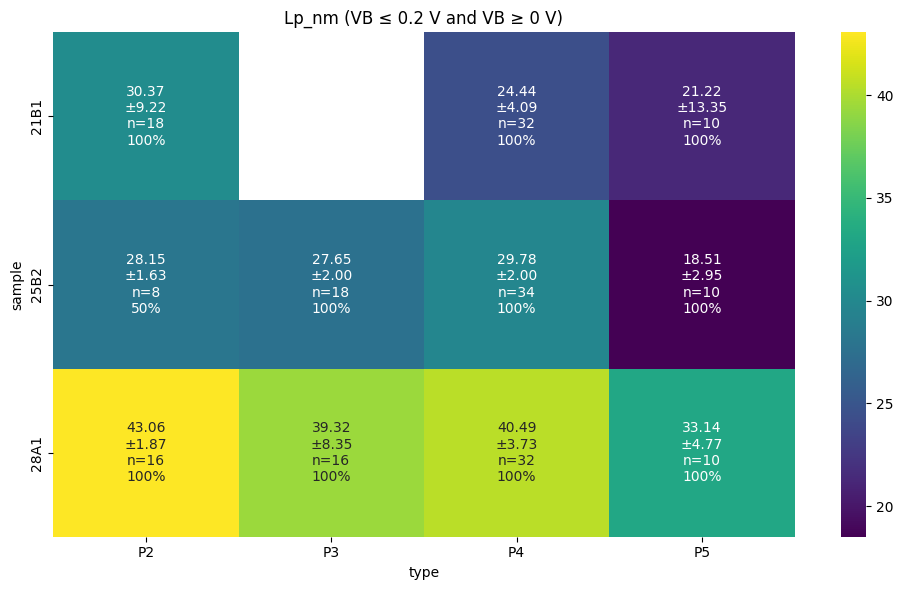

In [19]:
heatmap_with_stats(df_no26B, value_col='Lp_nm', vb_limit_up=0.2)

In [20]:
df.columns 

Index(['sample_folder', 'filename', 'sample', 'type', 'zoom', 'aperture', 'vb',
       'profile', 'depletion_width_um', 'left_slope', 'left_r2', 'left_Lp_um',
       'left_start_um', 'right_slope', 'right_r2', 'right_Ln_um',
       'right_start_um', 'T', 'ratio', 'P', 'D', 'A_ratio', 'Lp_nm', 'Ln_nm',
       'depletion_width_nm', 'right_start_nm', 'left_start_nm'],
      dtype='object')

In [21]:
heatmap_with_stats(df_no26B, value_col='Lp_nm', vb_limit=0.2)


TypeError: heatmap_with_stats() got an unexpected keyword argument 'vb_limit'

C:\Users\biselli\AppData\Local\Temp\ipykernel_30372\4128383046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NaN["Lp_nm"] = 0  # Placeholder so pivot_table count works


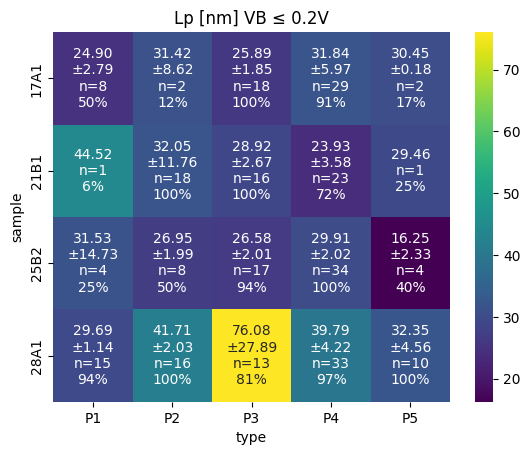

In [ ]:
# --- FILTERING (same as depletion_width version) ---
df_no26B = df[~df['sample'].str.startswith('26B')]  # Exclude 26B samples
df_novb = df_no26B[(df_no26B['vb'] <= 0.2) & (df_no26B['Lp_nm'].notna())]   # Valid values
df_NaN  = df_no26B[(df_no26B['vb'] <= 0.2) & (df_no26B['Lp_nm'].isna())]    # Missing values
df_NaN["Lp_nm"] = 0  # Placeholder so pivot_table count works


# --- PIVOT TABLES FOR MEAN / STD / VALID COUNT ---
pivot_data  = df_novb.pivot_table(values='Lp_nm', index='sample', columns='type', aggfunc='mean')
pivot_std   = df_novb.pivot_table(values='Lp_nm', index='sample', columns='type', aggfunc='std')
pivot_count = df_novb.pivot_table(values='Lp_nm', index='sample', columns='type', aggfunc='count')


# --- PIVOT TABLE FOR NaN COUNT ---
pivot_count_nan = df_NaN.pivot_table(values='Lp_nm', index='sample', columns='type', aggfunc='count')


# --- ALIGN SHAPES ---
pivot_std        = pivot_std.reindex_like(pivot_data)
pivot_count      = pivot_count.reindex_like(pivot_data)
pivot_count_nan  = pivot_count_nan.reindex_like(pivot_data)

valid   = pivot_count.fillna(0)
missing = pivot_count_nan.fillna(0)
total   = valid + missing

pivot_percent_present = (valid / total * 100).round(0)


# --- ANNOTATION TABLE ---
annot = pivot_data.copy().astype(str)

for i in range(len(pivot_data)):
    for j in range(len(pivot_data.columns)):
        mean_val = pivot_data.iloc[i, j]
        std_val  = pivot_std.iloc[i, j]
        count_val = pivot_count.iloc[i, j]
        perc_val  = pivot_percent_present.iloc[i, j]

        if pd.notna(mean_val):
            mean_str  = f"{mean_val:.2f}"
            std_str   = f"±{std_val:.2f}" if pd.notna(std_val) else ""
            count_str = f"n={int(count_val)}" if pd.notna(count_val) else ""
            perc_str  = f"{perc_val:.0f}%" if pd.notna(perc_val) else ""

            annot.iloc[i, j] = "\n".join(
                x for x in [mean_str, std_str, count_str, perc_str] if x
            )
        else:
            annot.iloc[i, j] = ""


# --- HEATMAP ---
sn.heatmap(pivot_data, annot=annot, fmt='', cmap='viridis')
plt.title("Lp [nm] VB ≤ 0.2V")
plt.show()